In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import random
import numpy as np

<font size=4> <b>Binomial Distribution:</b><br>Probability distribution that describes the outcome of <i><b>n</b></i> <u>identical</u> Bernoulli trials each with a probability of success <i><b>p</b></i>

<i><br><br>Example: <br>Suppose I take a test of 10 multiple choice problems each with 5 answer options (and only one option is correct), what is the probability that I will get exactly 4 questions right just by guessing ?</i>

</font>

In [25]:
# number of Binomial tests to run (where each test consists of "n" Bernoulli trials)
numSamples = 1000000

# number of Bernoulli trials "n" (i.e. the 10 problems)
trials_per_sample = 10

# target number of successful guesses
numSuccesses = 4

# probability of success at each guess
numOptions = 5
numCorrectAnswers = 1
p = 1.0*numCorrectAnswers/numOptions

In [26]:
# this function returns the number of successes for each Binomial test
def run_sample(trials_per_sample):
    numSuccess = 0
    for i in range(trials_per_sample):
        thisAnswer = random.randint(1,numOptions) # the correct answer to the current problem
        thisGuess = random.randint(1,numOptions) # my guess for the current problem
        if thisAnswer == thisGuess: # if my guess is correct...SUCCESS !!!
            numSuccess += 1
    return numSuccess

# this function returns the factorial of an integer passed to it
def factorial(n):
    if n==0:
        return 1
    else:
        return reduce(lambda x,y:x*y,range(1,n+1))

In [27]:
# this list holds the results (where each result is the number of successes in each Binomial test)
result = []

# run several Binomial tests and save the results
for i in range(numSamples):
    result.append(run_sample(trials_per_sample))

# probability obtained from the sampling
n = trials_per_sample
k = numSuccesses
print 'Sampled probability (' + str(numSamples) + ' samples):', 1.0*sum([i==k for i in result])/numSamples

# calculate the theoretical probability (using the binomial PDF)
n = trials_per_sample
k = numSuccesses
theoretical_Prob = (p**k)*((1-p)**(n-k))*factorial(n)/(factorial(k)*factorial(n-k))
print 'Theoretical probability:', theoretical_Prob

Sampled probability (1000000 samples): 0.088044
Theoretical probability: 0.088080384


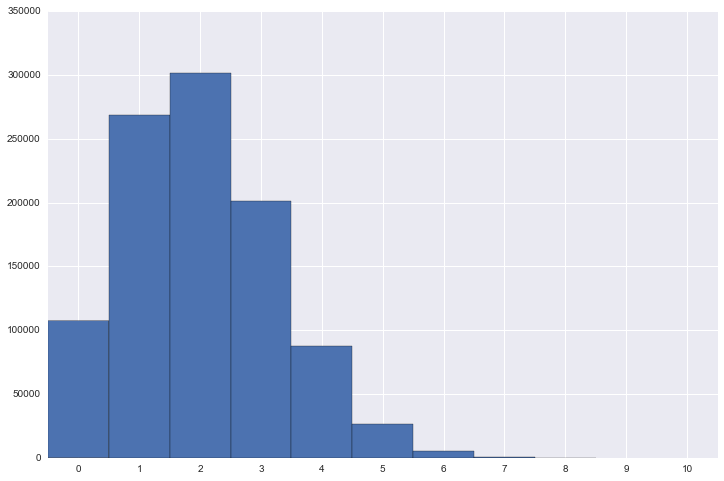

In [28]:
# plot a histogram that shows the distribution the number of successes over all Binomial tests
plt.figure(figsize=[12,8])
plt.hist(result, bins=[n-0.5 for n in range(trials_per_sample)]) # shift the bins by -0.5 to center the bars
plt.xlim([-0.5,trials_per_sample+0.5])
plt.xticks(range(trials_per_sample+1))
plt.show()

In [29]:
for j in range(trials_per_sample+1):
    print 'Probability of guessing ' + str(j) + ' answers right:', 1.0*sum([i==j for i in result])/numSamples

Probability of guessing 0 answers right: 0.107435
Probability of guessing 1 answers right: 0.268764
Probability of guessing 2 answers right: 0.301632
Probability of guessing 3 answers right: 0.201166
Probability of guessing 4 answers right: 0.088044
Probability of guessing 5 answers right: 0.026521
Probability of guessing 6 answers right: 0.005628
Probability of guessing 7 answers right: 0.000746
Probability of guessing 8 answers right: 5.9e-05
Probability of guessing 9 answers right: 5e-06
Probability of guessing 10 answers right: 0.0


<br><br><br><font size=4> <b>Poisson Distribution:</b><br>Probability distribution that describes the outcome of an independent event that occurs at a known rate ($\lambda$ times over a specified time interval)

<i><br><br>Example: <br>Suppose a car-wash has an average of 2 cars come by every 3 minutes, what is the probability that no more than 4 cars will come by in the next 9 minutes ?</i>

</font>

In [30]:
# 2 cars every 3 minutes is the same rate as 6 cars every 9 minutes (540 seconds)
# so I think of each trial as equivalent to 540 distinct and independent events of which
# 6 are successful (on the average)

# number of trials
numSamp = 100000

# holds the result of each trial
thisList = []

sampSize = 540 # sample size for each trial (540 seconds)
rate_lambda = 6 # succesful event occurence rate (6 cars every 540 seconds)
sampRange = sampSize+1 # range of randints to sample from (i.e. [1,sampRange])

target_success = 4 # number of successful events we're trying to estimate a probability for (<=4 cars in 9 minutes)

# sample 540 random integers from 1 to 540
# the probability of finding a value less_than_or_equal_to 6 is = "6/540"
for i in range(numSamp):
    aa = np.random.randint(1,sampRange,[sampSize,])
    aa[aa>rate_lambda]=0 # disqualify all randints greater than 6...
    aa[aa!=0] = 1 # and keep only those <= 6...
    thisList.append(sum(aa)) # then append the number of successful outcomes for each trial to the list

In [31]:
print 'Probability of having no more than 4 cars pass thru in 9 minutes...\n'

bb = np.array(thisList) # convert the list to an array for easy manipulation by Numpy
theProbability = 1.0*sum(bb<=4)/len(bb) # how many of those samples had an outcome <= 4 cars
print 'Sampled (' + str(numSamp) + ' samples):', theProbability

calcProb = 0
for i in range(target_success+1):
    calcProb += (rate_lambda**i)*np.exp(-rate_lambda)/(factorial(i))
    
print 'Theoretical:', calcProb

Probability of having no more than 4 cars pass thru in 9 minutes...

Sampled (100000 samples): 0.28446
Theoretical: 0.285056500317


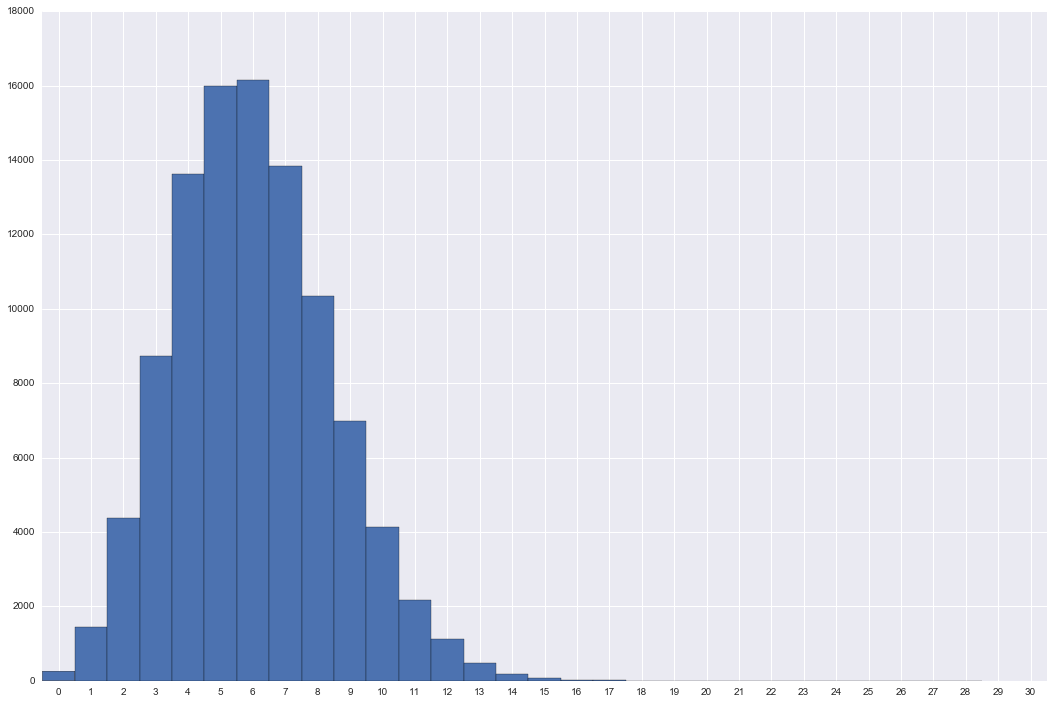

In [32]:
#plot a histrogram of the distribution of successful outcomes over all trials
numBins = 30
plt.figure(figsize=[18,12])
plt.hist(thisList, bins=[n-0.5 for n in range(numBins)]) # shift the bins by -0.5 to center the bars
plt.xlim([-0.5,numBins+0.5])
plt.xticks(range(numBins+1))
plt.show()